### The Agenda of this notebook is just to deep dive into the data, perform some EDA to learn some patterns and then these points will help us in Feature Engineering

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [333]:
url = 'https://drive.google.com/file/d/1GRRfOnM0cwB9cRlyUVZHw0com64VFz9o/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='iso-8859-1', on_bad_lines='skip')

In [334]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Category,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,NaN,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,NaN,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,NaN,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,NaN,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,NaN,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [335]:
upcs = list(df['UPC'].unique())
len(upcs)

4435

In [336]:
descriptions = list(df['SKU Descreption'].unique())
len(descriptions)

4435

In [337]:
products_upc_names = dict(zip(upcs,descriptions))

In [338]:
list(products_upc_names.items())[:10]

[(8435137727100, 'PRADA CANDY EDP V30ML V0'),
 (3605970326494, 'LANC RML CR NUIT J75ML SUB'),
 (3360374000110, 'VR FLBB BODY MILK 200ML SUB'),
 (3605971639944, 'LANC SETTING SPRAY 100ML'),
 (3605972496751, 'UD VICE LIPSTICK - FLOWER DISTRICT'),
 (3605972076168, 'KH CANNABIS CLEANSER 150ML'),
 (3605972496638, 'UD VICE LIPSTICK - LOVE TRAP'),
 (3605971477584, 'LANC TIU CAMO CORRECTOR GREEN 14G'),
 (3700194718541, 'KH OLIVE FRUIT REP HAIR PAK 250ML'),
 (3605972134004, 'UD STAY NAKED CONCEALER-60WR 10ML')]

In [339]:
df.shape

(302019, 12)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302019 entries, 0 to 302018
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Retailer Code    302019 non-null  object 
 1   Retailer Name    293381 non-null  object 
 2   Door Code        302019 non-null  int64  
 3   Door Name        302019 non-null  object 
 4   Door Zip Code    302019 non-null  object 
 5   Year             302019 non-null  int64  
 6   Week             302019 non-null  int64  
 7   UPC              302019 non-null  int64  
 8   SKU Category     0 non-null       float64
 9   SKU Descreption  302019 non-null  object 
 10  POS Units        302019 non-null  float64
 11  POS Amount       301140 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 27.7+ MB


In [341]:
df.isna().sum()

Retailer Code           0
Retailer Name        8638
Door Code               0
Door Name               0
Door Zip Code           0
Year                    0
Week                    0
UPC                     0
SKU Category       302019
SKU Descreption         0
POS Units               0
POS Amount            879
dtype: int64

In [342]:
df.drop(['SKU Category'], axis=1, inplace=True)

In [343]:
inds = pd.isna(df['Retailer Name'])

In [344]:
indexes = [i for i,n in enumerate(list(inds)) if n==True]

In [345]:
df_with_empty_values = df.iloc[indexes]

In [346]:
df_with_empty_values

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
11057,ECOM,NaN,600101,CLIENT INTERNET MAINE,UKN,2022,172022,3614273721189,BIOTH BTH AQS HYALU PROMO VALUE SET,1.0,33.28
11058,ECOM,NaN,600102,CLIENT INTERNET NEW HAMPSHIRE,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,1.0,30.91
11059,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
11060,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,152022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
11061,ECOM,NaN,600104,CLIENT INTERNET MASSACHUSETTS,UKN,2022,162022,3614271327352,BIOTH AQP SOIN NCS F/P 75ML R16 SUB,2.0,64.19
...,...,...,...,...,...,...,...,...,...,...,...
299673,ECOM,NaN,600149,CLIENT INTERNET CALIFORNIA,UKN,2022,162022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,1.0,13.14
299674,ECOM,NaN,600141,CLIENT INTERNET COLORADO,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,82.16
299675,ECOM,NaN,600147,CLIENT INTERNET WASHINGTON,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,82.15
299676,ECOM,NaN,600149,CLIENT INTERNET CALIFORNIA,UKN,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,4.0,328.61


In [347]:
df_with_empty_values['Retailer Code'].value_counts()

ECOM    8638
Name: Retailer Code, dtype: int64

In [348]:
df.loc[indexes, 'Retailer Name'] = 'ECOM'

In [349]:
df['Retailer Code'].value_counts()

SDM     139218
SEP      72830
BAY      32628
BOU      18482
PJC      16844
ECOM      8638
LON       6846
NST       2618
HRF       2351
UNI       1443
AMA        120
PHP          1
Name: Retailer Code, dtype: int64

In [350]:
df['Retailer Name'].value_counts()

SDM (HEAD OFFICE)          139218
SEPHORA CANADA              72830
LA BAIE                     32628
BOUTIQUES KIEHL'S           18482
JEAN-COUTU                  16844
ECOM                         8638
LONDON DRUGS                 6846
NORDSTROM CANADA RETAIL      2618
HOLT RENFREW                 2351
UNIPRIX BUREAU CHEF          1443
AMAZON                        120
KATZ PHARMACY SERVICES          1
Name: Retailer Name, dtype: int64

In [351]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [352]:
pos_units = df['POS Units'].value_counts()

In [353]:
pos_units[:5]

 1.0    221672
 2.0     40340
 3.0     12232
-1.0     10672
 4.0      5473
 5.0      2838
Name: POS Units, dtype: int64

<BarContainer object of 281 artists>

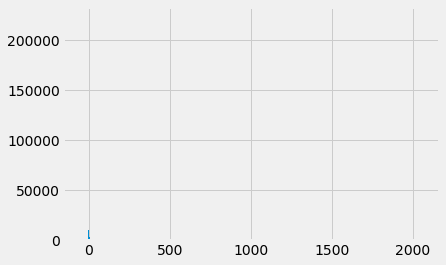

In [354]:
plt.bar(pos_units.keys(), pos_units.values)

In [355]:
df['Week'].value_counts()

152022    81715
162022    75397
172022    71001
142022    67137
182022     6769
Name: Week, dtype: int64

In [356]:
### Building 

### Removing the unrequired features

In [357]:
# df.drop(['Retailer Code', 'Door Code', 'Door Name', 'Year', 'Week', 'SKU Descreption', 'POS Amount'], axis=1, inplace=True)

In [358]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [359]:
df['Door Zip Code'].value_counts()

UKN        8638
L6T 5A3    4901
M5B 2H1    3557
M9C 1B8    3551
M6A 2T9    3463
           ... 
N0P 2C0       1
L3R 6E4       1
J7A 4Z5       1
H7L 1L5       1
G1L 3R4       1
Name: Door Zip Code, Length: 1864, dtype: int64

In [360]:
retailers = df['Retailer Name'].value_counts()

In [361]:
retailers

SDM (HEAD OFFICE)          139218
SEPHORA CANADA              72830
LA BAIE                     32628
BOUTIQUES KIEHL'S           18482
JEAN-COUTU                  16844
ECOM                         8638
LONDON DRUGS                 6846
NORDSTROM CANADA RETAIL      2618
HOLT RENFREW                 2351
UNIPRIX BUREAU CHEF          1443
AMAZON                        120
KATZ PHARMACY SERVICES          1
Name: Retailer Name, dtype: int64

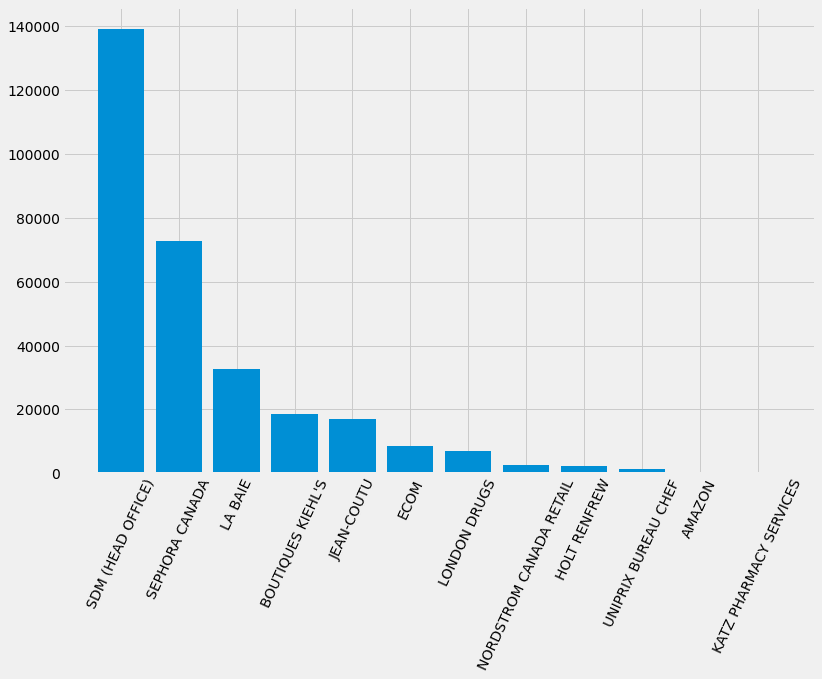

In [362]:
plt.figure(figsize = (12,8))
plt.bar(retailers.keys(), retailers.values)
plt.xticks(rotation=65);

In [363]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0


### Simplyfing the dataset

In [364]:
#Given the below dataframe, how much units have been given to each retailer vs how much have been received back

### Percentage of returns

In [365]:
df_returns = df.loc[df['POS Units'] <0]

In [366]:
df_returns

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,-1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,-1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,-1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,-1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,-1.0,-40.000
...,...,...,...,...,...,...,...,...,...,...,...
301982,SEP,SEPHORA CANADA,224051,SEPHORA #500 YONGE,M5B 2H1,2022,142022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,-1.0,-19.000
301991,SEP,SEPHORA CANADA,234614,SEPHORA #544 SHERWAY GARDENS,M9C 1B8,2022,142022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,-1.0,-19.000
301996,SEP,SEPHORA CANADA,247235,SEPHORA #1532 GRANDVIEW CORNERS,V3Z 0C8,2022,142022,3605972659729,IT CC NUDE GLOW 32ML US FAIR NUDE,-1.0,-42.400
302002,SEP,SEPHORA CANADA,241872,SEPHORA #860 BRAMALEA,L6T 3R5,2022,142022,3614272404786,MM REPL SAILING DAY EDT S10ML,-1.0,-67.576


=> Some basic statistics that can be extracted are, Out of 302019 products allocation, 11205 times, the products are returned

In [367]:
return_percentage = (df_returns.shape[0]/df.shape[0])*100

In [368]:
return_percentage

3.710031488085187

### Lets find out which retailers have the highest return of products

In [369]:
df_returns.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,-1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,-1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,-1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,-1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,-1.0,-40.000


### No of times return happened for each retailer

In [370]:
number_of_returns_for_retailers = df_returns.groupby(['Retailer Name']).count()['POS Units']

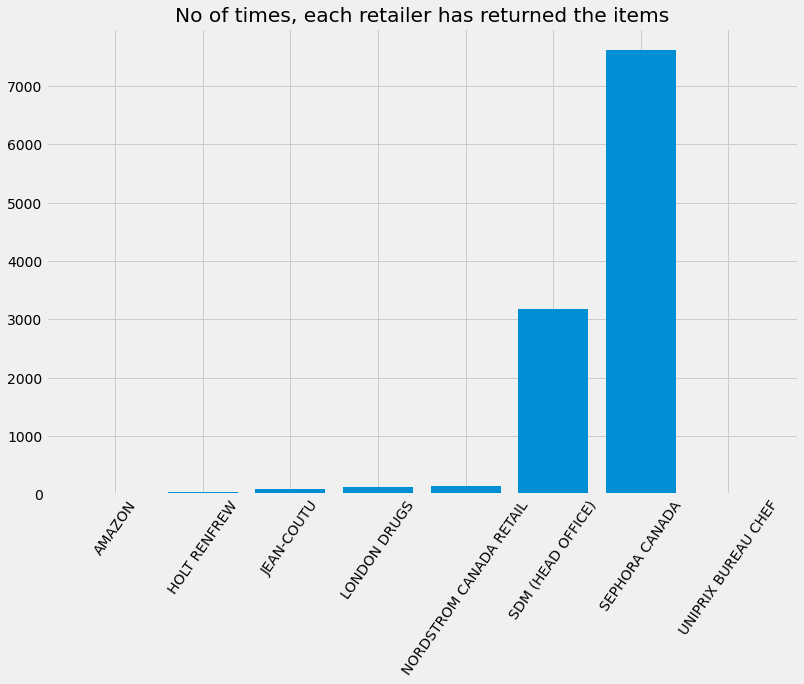

In [371]:
plt.figure(figsize=(12,8))
plt.title('No of times, each retailer has returned the items')
plt.xticks(rotation=55)
plt.bar(number_of_returns_for_retailers.keys(), number_of_returns_for_retailers.values);

In [372]:
number_of_returns_for_retailers

Retailer Name
AMAZON                        1
HOLT RENFREW                 35
JEAN-COUTU                   94
LONDON DRUGS                127
NORDSTROM CANADA RETAIL     145
SDM (HEAD OFFICE)          3184
SEPHORA CANADA             7618
UNIPRIX BUREAU CHEF           1
Name: POS Units, dtype: int64

### Total number of items that were returned by each retailer

In [373]:
count_of_returns_for_retailers = df_returns.groupby(['Retailer Name'])['POS Units'].sum()

In [374]:
count_of_returns_for_retailers

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

In [375]:
total_items_returned_by_each_retailer = [np.abs(x) for x in count_of_returns_for_retailers.values]

In [376]:
total_items_returned_by_each_retailer

[1.0, 38.0, 95.0, 129.0, 164.0, 3314.0, 8134.0, 1.0]

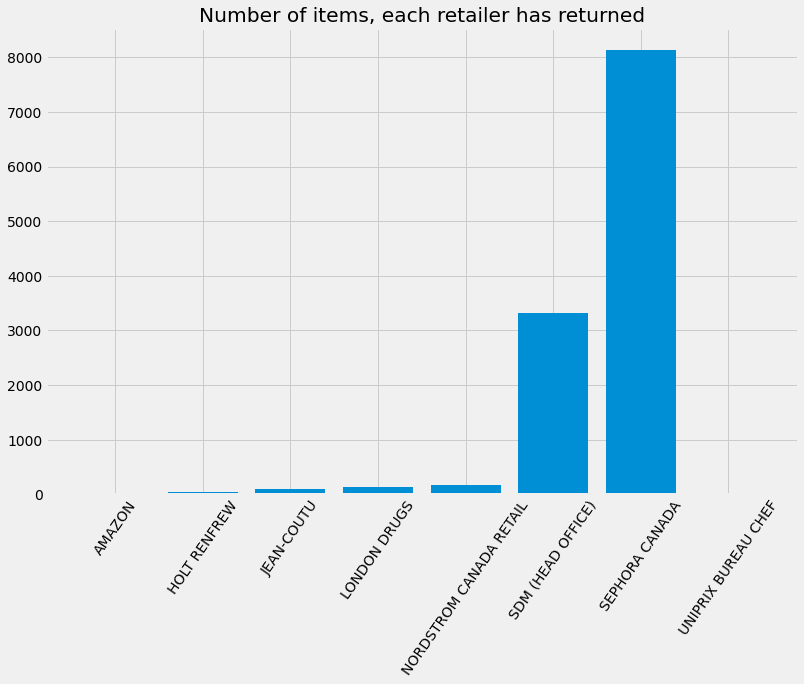

In [377]:
plt.figure(figsize=(12,8))
plt.title('Number of items, each retailer has returned')
plt.xticks(rotation=55)
plt.bar(count_of_returns_for_retailers.keys(), total_items_returned_by_each_retailer);

In [378]:
df.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8
3,SEP,SEPHORA CANADA,229842,SEPHORA #522 PTE-CLAIRE,H9R 1C4,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0
4,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3360374000110,VR FLBB BODY MILK 200ML SUB,1.0,73.0


In [379]:
df.shape

(302019, 11)

In [380]:
df[df['Retailer Name'].isin(['LONDON DRUGS', 'JEAN-COUTU'])]

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
144,LON,LONDON DRUGS,216861,LONDON DRUGS #60,T1B 1E2,2022,152022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,85.00
145,LON,LONDON DRUGS,239308,LONDON DRUGS #86,S4W 0B7,2022,152022,3360372058861,GA ADGH EDT SP 50ML SUB,1.0,95.00
146,LON,LONDON DRUGS,239308,LONDON DRUGS #86,S4W 0B7,2022,152022,3365440375055,YSL NUIT EDT SPRAY 60ML SUB,1.0,96.00
147,LON,LONDON DRUGS,221758,LONDON DRUGS #65,S7K 5S6,2022,152022,3360372058861,GA ADGH EDT SP 50ML SUB,1.0,95.00
148,LON,LONDON DRUGS,213529,LONDON DRUGS #09,V3R 1B9,2022,152022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,148.00
...,...,...,...,...,...,...,...,...,...,...,...
301915,LON,LONDON DRUGS,216828,LONDON DRUGS #24,T4R 3A2,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00
301916,LON,LONDON DRUGS,213529,LONDON DRUGS #09,V3R 1B9,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,86.25
301917,LON,LONDON DRUGS,217762,LONDON DRUGS #29,V8V 3M4,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00
301918,LON,LONDON DRUGS,212731,LONDON DRUGS #44,V7T 1H9,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00


In [381]:
df[df['Retailer Name'] == 'LONDON DRUGS']

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
144,LON,LONDON DRUGS,216861,LONDON DRUGS #60,T1B 1E2,2022,152022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,85.00
145,LON,LONDON DRUGS,239308,LONDON DRUGS #86,S4W 0B7,2022,152022,3360372058861,GA ADGH EDT SP 50ML SUB,1.0,95.00
146,LON,LONDON DRUGS,239308,LONDON DRUGS #86,S4W 0B7,2022,152022,3365440375055,YSL NUIT EDT SPRAY 60ML SUB,1.0,96.00
147,LON,LONDON DRUGS,221758,LONDON DRUGS #65,S7K 5S6,2022,152022,3360372058861,GA ADGH EDT SP 50ML SUB,1.0,95.00
148,LON,LONDON DRUGS,213529,LONDON DRUGS #09,V3R 1B9,2022,152022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,148.00
...,...,...,...,...,...,...,...,...,...,...,...
301915,LON,LONDON DRUGS,216828,LONDON DRUGS #24,T4R 3A2,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00
301916,LON,LONDON DRUGS,213529,LONDON DRUGS #09,V3R 1B9,2022,152022,772192624325,BIOTH BT RA SET WINTER 21,1.0,86.25
301917,LON,LONDON DRUGS,217762,LONDON DRUGS #29,V8V 3M4,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00
301918,LON,LONDON DRUGS,212731,LONDON DRUGS #44,V7T 1H9,2022,152022,3605970002534,LANC BMV NIGHT J50ML SUB,1.0,74.00


In [382]:
count_of_returns_for_retailers

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

In [383]:
df_returns.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,-1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,-1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,-1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,-1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,-1.0,-40.000


In [384]:
items_delivered_to_retailers = df[df['POS Units']>0].groupby(['Retailer Name'])['POS Units'].sum()

In [385]:
items_returned_from_retailers = df_returns.groupby(['Retailer Name'])['POS Units'].sum()

### Since not every retailer has returned the items, we will look at those who did returns

In [386]:
retailers_that_returned_items = list(set(items_delivered_to_retailers.keys()).intersection(items_returned_from_retailers.keys()))
retailers_that_never_returned_items = list(set(items_delivered_to_retailers.keys()).difference(items_returned_from_retailers.keys()))

### Retailers that have never returned any products (Best to remove these retailers while developing the model)

In [387]:
retailers_that_never_returned_items

['ECOM', "BOUTIQUES KIEHL'S", 'LA BAIE', 'KATZ PHARMACY SERVICES']

### Retailers who did returns

In [388]:
retailers_that_returned_items

['LONDON DRUGS',
 'HOLT RENFREW',
 'SDM (HEAD OFFICE)',
 'UNIPRIX BUREAU CHEF',
 'JEAN-COUTU',
 'AMAZON',
 'SEPHORA CANADA',
 'NORDSTROM CANADA RETAIL']

In [389]:
retailers_with_items_delivered = df[(df['POS Units'] > 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].count()

In [390]:
retailers_with_items_returned = df[(df['POS Units'] < 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].count()

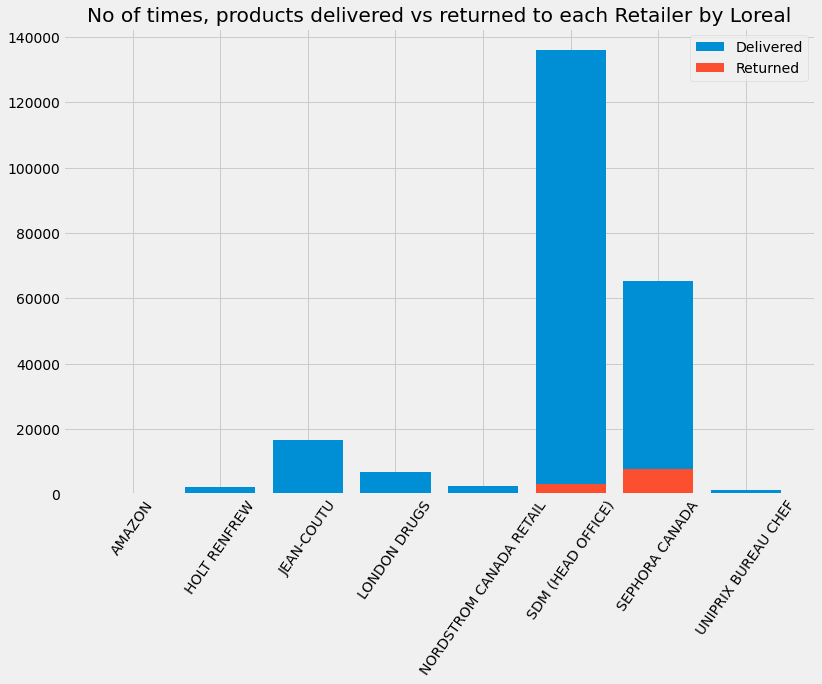

In [391]:
plt.figure(figsize=(12,8))
plt.title('No of times, products delivered vs returned to each Retailer by Loreal')
plt.xticks(rotation=55)
plt.bar(retailers_with_items_delivered.keys(), retailers_with_items_delivered.values);
plt.bar(retailers_with_items_returned.keys(), retailers_with_items_returned.values);
plt.legend(['Delivered','Returned']);

In [392]:
retailers_with_items_delivered

Retailer Name
AMAZON                        119
HOLT RENFREW                 2316
JEAN-COUTU                  16750
LONDON DRUGS                 6719
NORDSTROM CANADA RETAIL      2473
SDM (HEAD OFFICE)          136034
SEPHORA CANADA              65212
UNIPRIX BUREAU CHEF          1442
Name: POS Units, dtype: int64

In [393]:
retailers_with_items_returned

Retailer Name
AMAZON                        1
HOLT RENFREW                 35
JEAN-COUTU                   94
LONDON DRUGS                127
NORDSTROM CANADA RETAIL     145
SDM (HEAD OFFICE)          3184
SEPHORA CANADA             7618
UNIPRIX BUREAU CHEF           1
Name: POS Units, dtype: int64

In [394]:
df.head(3)

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
0,SEP,SEPHORA CANADA,246843,SEPHORA #1520 LINDENWOODS,R3P 2N3,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
1,SEP,SEPHORA CANADA,247394,SEPHORA #1538 TRINITY CROSSING,K4A 5E6,2022,142022,8435137727100,PRADA CANDY EDP V30ML V0,1.0,90.0
2,SEP,SEPHORA CANADA,229841,SEPHORA #518 OTTAWA,K1N 9J7,2022,142022,3605970326494,LANC RML CR NUIT J75ML SUB,1.0,30.8


In [395]:
#products returned vs received by each retailer
retailers = df['Retailer Name'].unique()
retailers

array(['SEPHORA CANADA', 'LONDON DRUGS', 'NORDSTROM CANADA RETAIL',
       'LA BAIE', 'HOLT RENFREW', 'JEAN-COUTU', 'SDM (HEAD OFFICE)',
       'AMAZON', "BOUTIQUES KIEHL'S", 'ECOM', 'UNIPRIX BUREAU CHEF',
       'KATZ PHARMACY SERVICES'], dtype=object)

In [396]:
### Stacked Bar Chart that shows the count products received vs no. of times products returned (2 colors in 1 bar)

In [397]:
retailers_with_sum_of_items_delivered = df[(df['POS Units'] > 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].sum()

In [398]:
retailers_with_sum_of_items_returned = df[(df['POS Units'] < 0) & (df['Retailer Name'].isin(retailers_that_returned_items))].groupby(['Retailer Name'])['POS Units'].sum()

In [399]:
retailers_with_sum_of_items_returned

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

In [400]:
retailers_with_sum_of_items_returned_absolute = [np.abs(x) for x in retailers_with_sum_of_items_returned.values]

In [401]:
retailers_with_sum_of_items_returned_absolute

[1.0, 38.0, 95.0, 129.0, 164.0, 3314.0, 8134.0, 1.0]

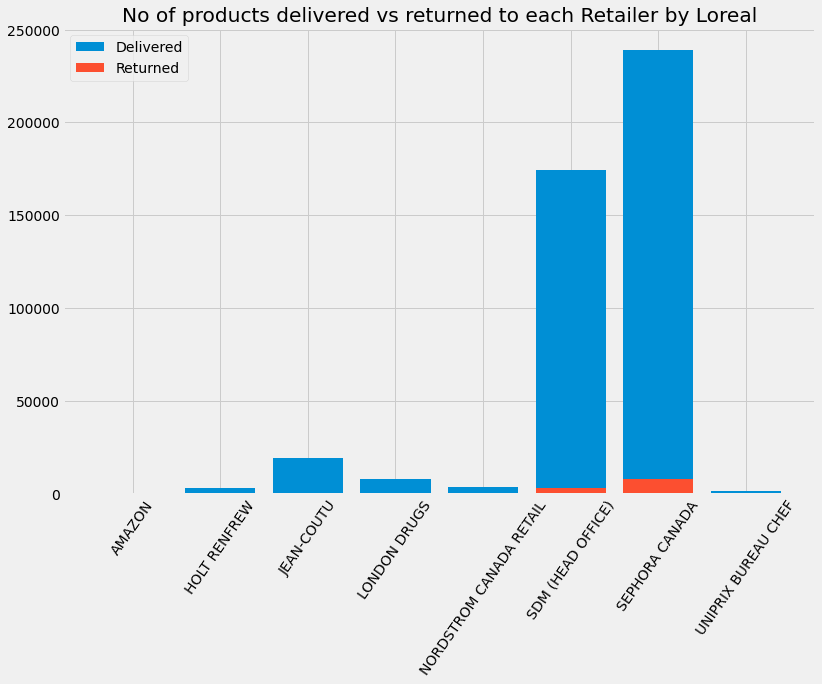

In [402]:
plt.figure(figsize=(12,8))
plt.title('No of products delivered vs returned to each Retailer by Loreal')
plt.xticks(rotation=55)
plt.bar(retailers_with_sum_of_items_delivered.keys(), retailers_with_sum_of_items_delivered.values);
plt.bar(retailers_with_sum_of_items_returned.keys(), retailers_with_sum_of_items_returned_absolute);
plt.legend(['Delivered','Returned']);

In [403]:
retailers_with_sum_of_items_delivered

Retailer Name
AMAZON                        557.0
HOLT RENFREW                 3392.0
JEAN-COUTU                  19620.0
LONDON DRUGS                 8159.0
NORDSTROM CANADA RETAIL      3678.0
SDM (HEAD OFFICE)          174424.0
SEPHORA CANADA             239030.0
UNIPRIX BUREAU CHEF          1574.0
Name: POS Units, dtype: float64

In [404]:
retailers_with_sum_of_items_returned

Retailer Name
AMAZON                       -1.0
HOLT RENFREW                -38.0
JEAN-COUTU                  -95.0
LONDON DRUGS               -129.0
NORDSTROM CANADA RETAIL    -164.0
SDM (HEAD OFFICE)         -3314.0
SEPHORA CANADA            -8134.0
UNIPRIX BUREAU CHEF          -1.0
Name: POS Units, dtype: float64

### Returns by each specific retailer location

### Which items are being returned the most number of times

In [405]:
most_no_of_returned_items_20 = df_returns['UPC'].value_counts()[:20]

In [406]:
most_no_of_returned_items_20_str = [str(x) for x in most_no_of_returned_items_20.keys()]

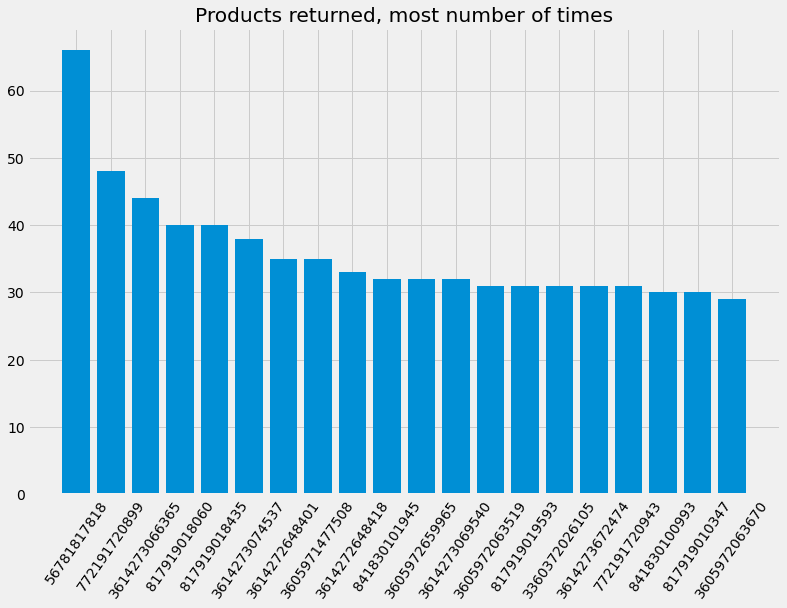

In [407]:
plt.figure(figsize=(12,8))
plt.title('Products returned, most number of times')
plt.xticks(rotation=55)
plt.bar(most_no_of_returned_items_20_str, most_no_of_returned_items_20.values);

In [408]:
#map upcs to their names
returned_product_names = [products_upc_names.get(int(key)) for key in most_no_of_returned_items_20_str]

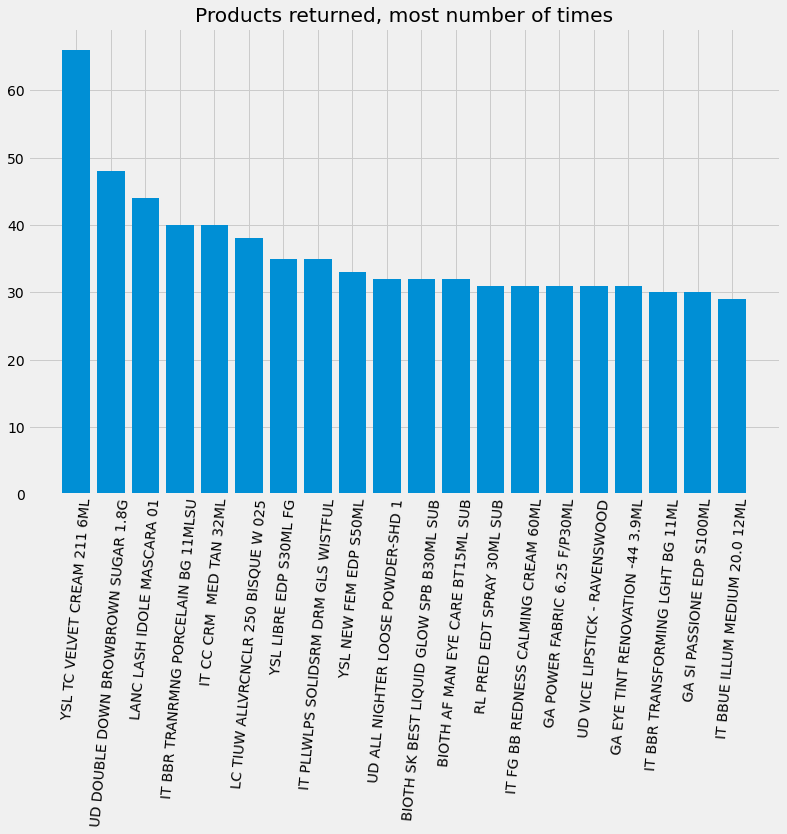

In [409]:
plt.figure(figsize=(12,8))
plt.title('Products returned, most number of times')
plt.xticks(rotation=85)
plt.bar(returned_product_names, most_no_of_returned_items_20.values);

In [410]:
most_no_of_returned_items_df = pd.DataFrame({'Product':returned_product_names, 'Return Quantity': most_no_of_returned_items_20.values})
most_no_of_returned_items_df

,Product,Return Quantity
0,YSL TC VELVET CREAM 211 6ML,66
1,UD DOUBLE DOWN BROWBROWN SUGAR 1.8G,48
2,LANC LASH IDOLE MASCARA 01,44
3,IT BBR TRANRMNG PORCELAIN BG 11MLSU,40
4,IT CC CRM MED TAN 32ML,40
5,LC TIUW ALLVRCNCLR 250 BISQUE W 025,38
6,YSL LIBRE EDP S30ML FG,35
7,IT PLLWLPS SOLIDSRM DRM GLS WISTFUL,35
8,YSL NEW FEM EDP S50ML,33
9,UD ALL NIGHTER LOOSE POWDER-SHD 1,32


### Which items are being returned in the most number of quantity

In [411]:
df_returns.head()

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,-1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,-1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,-1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,-1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,-1.0,-40.000


In [412]:
df_returns['POS Units'] = df_returns['POS Units'].apply(lambda x: x*-1)
df_returns.head()

C:\Users\Mehreen Faisal\AppData\Local\Temp\ipykernel_11880\1748065180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_returns['POS Units'] = df_returns['POS Units'].apply(lambda x: x*-1)


,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,1.0,-40.000


In [413]:
most_quantity_of_returned_items = df_returns.groupby(['UPC'])['POS Units'].sum().sort_values(ascending=False)[:20]

In [414]:
most_quantity_of_returned_items_str = [str(x) for x in most_quantity_of_returned_items.keys()]

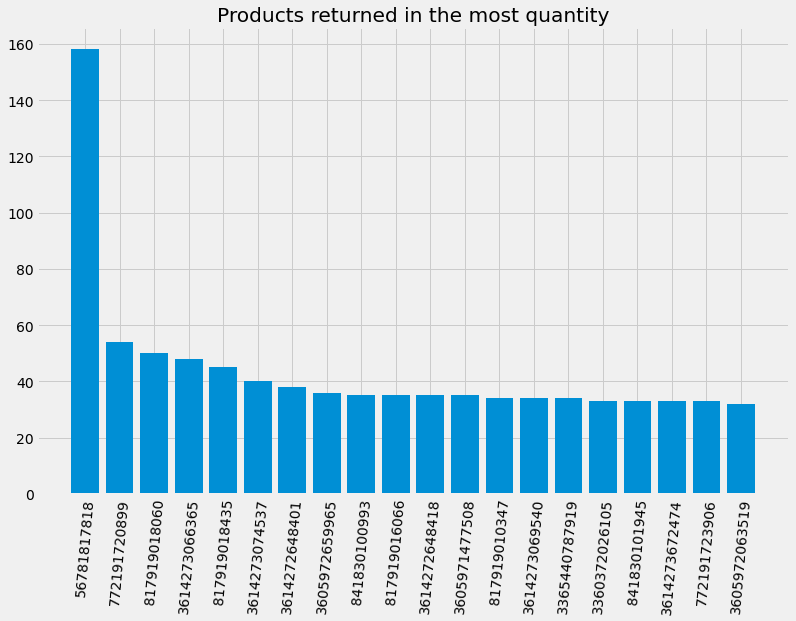

In [415]:
plt.figure(figsize=(12,8))
plt.title('Products returned in the most quantity')
plt.xticks(rotation=85)
plt.bar(most_quantity_of_returned_items_str, most_quantity_of_returned_items.values);

In [416]:
#map upcs to their names
returned_product_names = [products_upc_names.get(int(key)) for key in most_quantity_of_returned_items_str]

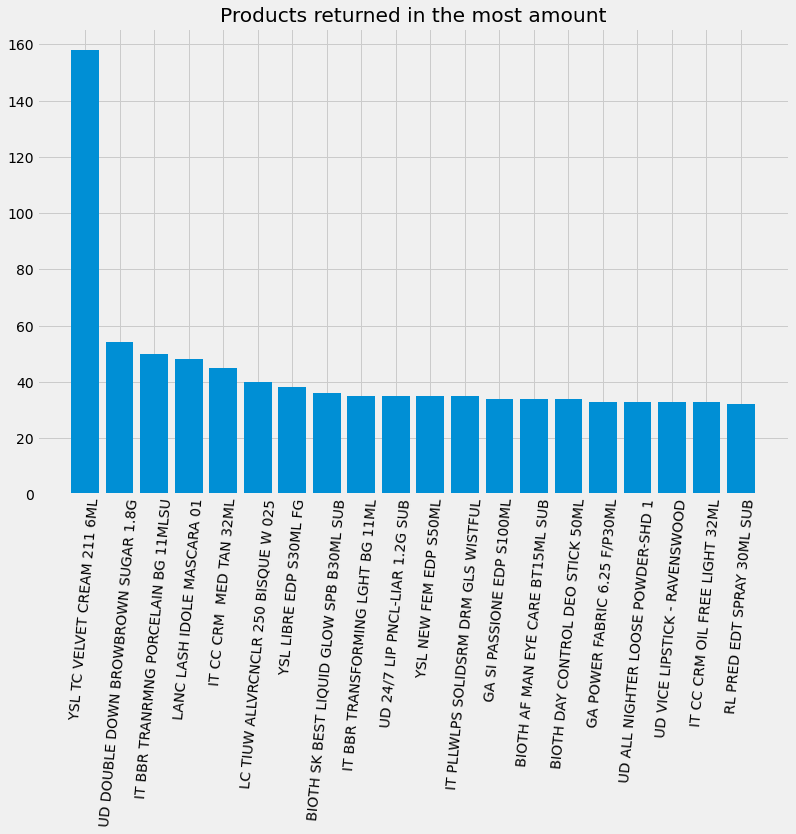

In [417]:
plt.figure(figsize=(12,8))
plt.title('Products returned in the most amount')
plt.xticks(rotation=85)
plt.bar(returned_product_names, most_quantity_of_returned_items.values);

In [418]:
most_amount_of_returned_items_df = pd.DataFrame({'Product':returned_product_names, 'Return Quantity': most_quantity_of_returned_items.values})
most_amount_of_returned_items_df

,Product,Return Quantity
0,YSL TC VELVET CREAM 211 6ML,158.0
1,UD DOUBLE DOWN BROWBROWN SUGAR 1.8G,54.0
2,IT BBR TRANRMNG PORCELAIN BG 11MLSU,50.0
3,LANC LASH IDOLE MASCARA 01,48.0
4,IT CC CRM MED TAN 32ML,45.0
5,LC TIUW ALLVRCNCLR 250 BISQUE W 025,40.0
6,YSL LIBRE EDP S30ML FG,38.0
7,BIOTH SK BEST LIQUID GLOW SPB B30ML SUB,36.0
8,IT BBR TRANSFORMING LGHT BG 11ML,35.0
9,UD 24/7 LIP PNCL-LIAR 1.2G SUB,35.0


In [419]:
most_no_of_returned_items_df

,Product,Return Quantity
0,YSL TC VELVET CREAM 211 6ML,66
1,UD DOUBLE DOWN BROWBROWN SUGAR 1.8G,48
2,LANC LASH IDOLE MASCARA 01,44
3,IT BBR TRANRMNG PORCELAIN BG 11MLSU,40
4,IT CC CRM MED TAN 32ML,40
5,LC TIUW ALLVRCNCLR 250 BISQUE W 025,38
6,YSL LIBRE EDP S30ML FG,35
7,IT PLLWLPS SOLIDSRM DRM GLS WISTFUL,35
8,YSL NEW FEM EDP S50ML,33
9,UD ALL NIGHTER LOOSE POWDER-SHD 1,32


### Which Stores have the maximum returns

In [420]:
df_returns

,Retailer Code,Retailer Name,Door Code,Door Name,Door Zip Code,Year,Week,UPC,SKU Descreption,POS Units,POS Amount
5,SEP,SEPHORA CANADA,238292,SEPHORA #578 DIX30,J4Y 0L1,2022,142022,3605971639944,LANC SETTING SPRAY 100ML,1.0,-35.178
6,SEP,SEPHORA CANADA,238745,SEPHORA # 586 ANJOU,H1M 1W9,2022,142022,3605972496751,UD VICE LIPSTICK - FLOWER DISTRICT,1.0,-26.052
16,SEP,SEPHORA CANADA,237001,SEPHORA #550 STE-CATHERINE,H3B 5K4,2022,142022,3700194718541,KH OLIVE FRUIT REP HAIR PAK 250ML,1.0,-48.144
43,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,3605972134004,UD STAY NAKED CONCEALER-60WR 10ML,1.0,-38.000
44,SEP,SEPHORA CANADA,245177,SEPHORA #1504 COLOSSUS,L4L 9K5,2022,142022,817919019593,IT FG BB REDNESS CALMING CREAM 60ML,1.0,-40.000
...,...,...,...,...,...,...,...,...,...,...,...
301982,SEP,SEPHORA CANADA,224051,SEPHORA #500 YONGE,M5B 2H1,2022,142022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,1.0,-19.000
301991,SEP,SEPHORA CANADA,234614,SEPHORA #544 SHERWAY GARDENS,M9C 1B8,2022,142022,4935421773515,SHU CO ULTIME8 2021 NEWPKG FS B50,1.0,-19.000
301996,SEP,SEPHORA CANADA,247235,SEPHORA #1532 GRANDVIEW CORNERS,V3Z 0C8,2022,142022,3605972659729,IT CC NUDE GLOW 32ML US FAIR NUDE,1.0,-42.400
302002,SEP,SEPHORA CANADA,241872,SEPHORA #860 BRAMALEA,L6T 3R5,2022,142022,3614272404786,MM REPL SAILING DAY EDT S10ML,1.0,-67.576


1. Which Zip Codes have the maximum returns

In [468]:
store_returns = df_returns['Door Zip Code'].value_counts()[:20]
store_returns

M6A 2T9    247
M9C 1B8    245
M5B 2H1    228
L3R 4M9    219
L5B 2G6    197
L4C 5G2    196
M1P 4P5    191
V5H 4P1    189
V6Y 2B6    187
M2J 5A7    173
T2H 0K8    161
L6T 5A3    156
T3A 0E2    149
M5S 1R1    149
L4V 1E3    142
L4K 5W4    137
V3R 1N3    137
V7Y 1G5    129
T6H 4M6    127
H7T 1C8    126
Name: Door Zip Code, dtype: int64

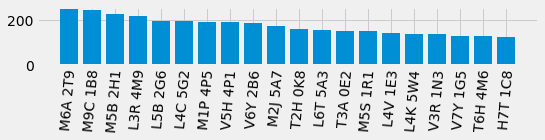

In [469]:
plt.figure(figsize = (8,1))
plt.bar(store_returns.keys(), store_returns.values)
plt.xticks(rotation=85);

2. Which Zip Codes have the maximum number of products returned

In [470]:
store_returns = df_returns.groupby(['Door Zip Code'])['POS Units'].sum().sort_values(ascending=False)[:20]
store_returns

Door Zip Code
M6A 2T9    271.0
L6T 5A3    265.0
M9C 1B8    263.0
M5B 2H1    253.0
L3R 4M9    238.0
L5B 2G6    209.0
L4C 5G2    205.0
M1P 4P5    205.0
V5H 4P1    204.0
V6Y 2B6    202.0
M2J 5A7    180.0
T2H 0K8    175.0
M5S 1R1    162.0
T3A 0E2    161.0
L4V 1E3    155.0
V3R 1N3    147.0
L4K 5W4    144.0
V7Y 1G5    139.0
T6H 4M6    135.0
H7T 1C8    133.0
Name: POS Units, dtype: float64

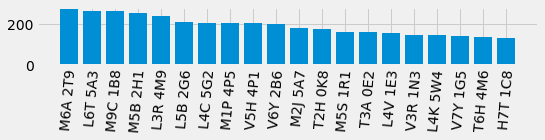

In [471]:
plt.figure(figsize = (8,1))
plt.bar(store_returns.keys(), store_returns.values)
plt.xticks(rotation=85);

3. Stores with max times of returns

In [463]:
store_returns = df_returns['Door Name'].value_counts()[:20]

In [464]:
store_returns

SEPHORA #502 YORKDALE                  227
SEPHORA #544 SHERWAY GARDENS           220
SEPHORA #500 YONGE                     216
SEPHORA # 584 MARKEVILLE               209
SEPHORA #504 MISSISSAUGA               197
SEPHORA #536 METROPOLIS                189
SEPHORA #548 RICHMOND                  187
SEPHORA #856 HILLCREST                 185
SEPHORA #506 SCARBOROUGH               180
SEPHORA #524 FAIRVIEW                  173
SEPHORA DOTCA E-COMMERCE               156
SEPHORA #508 BLOOR                     149
SEPHORA #896 HEARTLAND                 142
SEPHORA #580 GUILDFORD TOWNE CENTRE    137
SEPHORA #514 CHINOOK CENTRE            136
SEPHORA #512 MARKET MALL               133
SEPHORA #528 VANCOUVER                 129
SEPHORA #858 VAUGHAN MILLS             128
SEPHORA #534 SOUTHGATE CENTER          127
SEPHORA #538 CARREFOUR LAVAL           126
Name: Door Name, dtype: int64

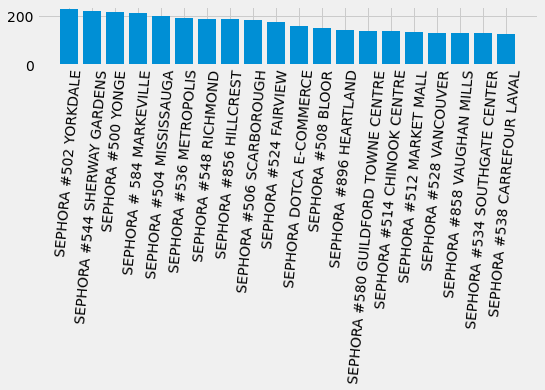

In [465]:
plt.figure(figsize = (8,1))
plt.bar(store_returns.keys(), store_returns.values)
plt.xticks(rotation=85);

4. Stores with max number of products of returns

In [472]:
store_returns = df_returns.groupby(['Door Name'])['POS Units'].sum().sort_values(ascending=False)[:20]
store_returns

Door Name
SEPHORA DOTCA E-COMMERCE               265.0
SEPHORA #502 YORKDALE                  250.0
SEPHORA #500 YONGE                     241.0
SEPHORA #544 SHERWAY GARDENS           238.0
SEPHORA # 584 MARKEVILLE               227.0
SEPHORA #504 MISSISSAUGA               209.0
SEPHORA #536 METROPOLIS                204.0
SEPHORA #548 RICHMOND                  202.0
SEPHORA #506 SCARBOROUGH               194.0
SEPHORA #856 HILLCREST                 193.0
SEPHORA #524 FAIRVIEW                  180.0
SEPHORA #508 BLOOR                     162.0
SEPHORA #896 HEARTLAND                 155.0
SEPHORA #580 GUILDFORD TOWNE CENTRE    147.0
SEPHORA #514 CHINOOK CENTRE            145.0
SEPHORA #512 MARKET MALL               141.0
SEPHORA #528 VANCOUVER                 139.0
SEPHORA #858 VAUGHAN MILLS             135.0
SEPHORA #534 SOUTHGATE CENTER          135.0
SEPHORA #538 CARREFOUR LAVAL           133.0
Name: POS Units, dtype: float64

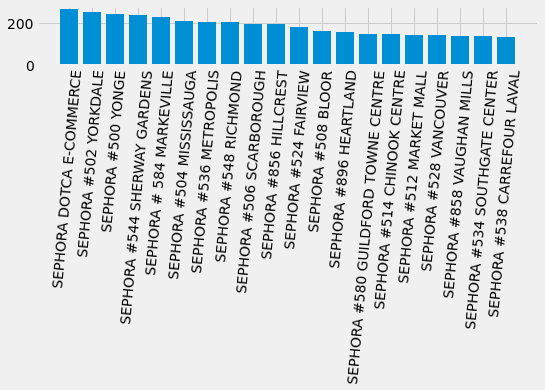

In [473]:
plt.figure(figsize = (8,1))
plt.bar(store_returns.keys(), store_returns.values)
plt.xticks(rotation=85);

### Which particular products are returned the most by each store (By Zip Code) in retailer

To do....

### Lets find out which stores for each retailers have the highest return of products

To do....

### Find the allocation done for each retailer throughout the year

To do....

### For each retailer, how much of the most RETURNED products are allocated

To do....

### For each retailer, at each Store location, how much of each product was allocated that were returned

To do....

### Which retailer has returned which items the most

To do...

### Any week or month where returns are maximum vs minimum

To do...

### finding any anomalies